# Import thư viện

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pyodbc

# Kết nối với server

In [ ]:
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=.;DATABASE=TH_DDS;Trusted_Connection=yes'

# Kết nối đến SQL Server
connection = pyodbc.connect(connection_string)

# Viết truy vấn SQL của bạn
query = """
    SELECT
    D.Year,
    L.Country,
    SUM(O.Sales) AS TotalSales
FROM
    Fact_Order O
    INNER JOIN Dim_Date D ON O.[Date ID_SK] = D.[Date ID_SK]
    INNER JOIN Dim_Location L ON O.[Location ID_SK] = L.[Location ID_SK]
GROUP BY
    D.Year,
    L.Country
ORDER BY
    D.Year,
    L.Country;
"""

# Sử dụng pandas để đọc dữ liệu từ truy vấn SQL vào DataFrame
df = pd.read_sql_query(query, connection)

# Đóng kết nối
connection.close()



D:\ANACONDA\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# In ra doanh thu theo từng năm của từng quốc gia

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

     Year                           Country    TotalSales
0    2011                       Afghanistan    1729.41000
1    2011                           Albania    1707.54000
2    2011                           Algeria    8539.80000
3    2011                            Angola    6416.91000
4    2011                         Argentina    8739.30512
5    2011                           Armenia     136.26000
6    2011                         Australia  137580.06000
7    2011                           Austria   21734.49000
8    2011                        Azerbaijan     802.92000
9    2011                        Bangladesh   22899.33000
10   2011                          Barbados     931.89992
11   2011                           Belarus     318.90000
12   2011                           Belgium   12002.52000
13   2011                             Benin    2656.83000
14   2011                           Bolivia    2775.54000
15   2011            Bosnia and Herzegovina     349.20000
16   2011     

In [ ]:
# Chọn các cột cần thiết
data = df[["Year", "Country", "TotalSales"]]

# Chuyển đổi dữ liệu thời gian sang kiểu số
data["Year"] = data["Year"].astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data = data[data["Year"] <= 2014]
test_data = data[data["Year"] >= 2015]

# Tạo mô hình Linear Regression cho mỗi quốc gia
models = {}

for country in data["Country"].unique():
    # Lọc dữ liệu cho quốc gia cụ thể
    country_data = train_data[train_data["Country"] == country]

    # Kiểm tra xem có ít nhất một điểm dữ liệu cho quốc gia hay không
    if country_data.shape[0] > 0:
        # Tách các cột biến độc lập và biến phụ thuộc cho tập huấn luyện
        X_train_country = country_data[["Year"]]
        y_train_country = country_data["TotalSales"]

        # Tạo và huấn luyện mô hình
        model_country = LinearRegression()
        model_country.fit(X_train_country, y_train_country)

        # Lưu trữ mô hình trong từ điển với tên quốc gia làm khóa
        models[country] = model_country




# Dự đoán doanh số bán hàng cho mỗi quốc gia năm 2015

In [ ]:

year_2015 = 2015
predicted_sales_2015_by_country = {}

for country, model_country in models.items():
    # Dự đoán doanh số bán hàng cho quốc gia cụ thể
    predicted_sales_2015 = model_country.predict([[year_2015]])

    # Lưu trữ kết quả trong từ điển
    predicted_sales_2015_by_country[country] = predicted_sales_2015[0]

# Hiển thị kết quả dự đoán
for country, predicted_sales in predicted_sales_2015_by_country.items():
    print(f"Dự đoán doanh thu của {country} vào 2015:", predicted_sales)

Dự đoán doanh thu của Afghanistan vào 2015: 7885.979999999981
Dự đoán doanh thu của Albania vào 2015: -31.934999999939464
Dự đoán doanh thu của Algeria vào 2015: 11253.59999999986
Dự đoán doanh thu của Angola vào 2015: 8795.880000000121
Dự đoán doanh thu của Argentina vào 2015: 28387.856579998508
Dự đoán doanh thu của Armenia vào 2015: -95.27999999999884
Dự đoán doanh thu của Australia vào 2015: 380428.99649998546
Dự đoán doanh thu của Austria vào 2015: 30243.31499999948
Dự đoán doanh thu của Azerbaijan vào 2015: 2601.0
Dự đoán doanh thu của Bangladesh vào 2015: 20713.170000000042
Dự đoán doanh thu của Barbados vào 2015: 3369.7457200000063
Dự đoán doanh thu của Belarus vào 2015: 9150.435000000522
Dự đoán doanh thu của Belgium vào 2015: 15191.669999999925
Dự đoán doanh thu của Benin vào 2015: 1390.1399999999849
Dự đoán doanh thu của Bolivia vào 2015: 2778.829999999987
Dự đoán doanh thu của Bosnia and Herzegovina vào 2015: 919.4700000000012
Dự đoán doanh thu của Brazil vào 2015: 137614.9

D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

# Hiển thị kết quả theo dạng bảng

In [ ]:

predicted_sales_df = pd.DataFrame(columns=["Year", "Country", "TotalSales"])

for country, predicted_sales in predicted_sales_2015_by_country.items():
    predicted_sales_df = pd.concat([
        predicted_sales_df,
        pd.DataFrame({
            "Year": [year_2015],
            "Country": [country],
            "TotalSales": [predicted_sales]
        })
    ], ignore_index=True)


print(predicted_sales_df)


     Year                           Country    TotalSales
0    2015                       Afghanistan       7885.98
1    2015                           Albania       -31.935
2    2015                           Algeria       11253.6
3    2015                            Angola       8795.88
4    2015                         Argentina   28387.85658
5    2015                           Armenia        -95.28
6    2015                         Australia   380428.9965
7    2015                           Austria     30243.315
8    2015                        Azerbaijan        2601.0
9    2015                        Bangladesh      20713.17
10   2015                          Barbados    3369.74572
11   2015                           Belarus      9150.435
12   2015                           Belgium      15191.67
13   2015                             Benin       1390.14
14   2015                           Bolivia       2778.83
15   2015            Bosnia and Herzegovina        919.47
16   2015     

# Dự đoán doanh số bán hàng cho mỗi quốc gia năm 2016

In [ ]:
year_2016 = 2016
predicted_sales_2016_by_country = {}

for country, model_country in models.items():
    # Dự đoán doanh số bán hàng cho quốc gia cụ thể
    predicted_sales_2016 = model_country.predict([[year_2016]])

    # Lưu trữ kết quả trong từ điển
    predicted_sales_2016_by_country[country] = predicted_sales_2016[0]

# Hiển thị kết quả dự đoán
for country, predicted_sales2016 in predicted_sales_2016_by_country.items():
    print(f"Dự đoán doanh thu của {country} vào 2016:", predicted_sales2016)

Dự đoán doanh thu của Afghanistan vào 2016: 8873.040000000037
Dự đoán doanh thu của Albania vào 2016: -433.5209999999497
Dự đoán doanh thu của Algeria vào 2016: 12145.881000000052
Dự đoán doanh thu của Angola vào 2016: 9758.83200000017
Dự đoán doanh thu của Argentina vào 2016: 33991.82088399865
Dự đoán doanh thu của Armenia vào 2016: -153.16500000000815
Dự đoán doanh thu của Australia vào 2016: 440077.0097999871
Dự đoán doanh thu của Austria vào 2016: 33086.73599999957
Dự đoán doanh thu của Azerbaijan vào 2016: 3078.2489999999525
Dự đoán doanh thu của Bangladesh vào 2016: 21172.791000000085
Dự đoán doanh thu của Barbados vào 2016: 4000.216616000049
Dự đoán doanh thu của Belarus vào 2016: 11472.0
Dự đoán doanh thu của Belgium vào 2016: 16345.668000000063
Dự đoán doanh thu của Benin vào 2016: 1324.9889999999723
Dự đoán doanh thu của Bolivia vào 2016: 2731.4649999999965
Dự đoán doanh thu của Bosnia and Herzegovina vào 2016: 1027.3319999999949
Dự đoán doanh thu của Brazil vào 2016: 156550.

D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

# Hiển thị theo dạng bảng

In [ ]:
# Tạo DataFrame từ predicted_sales_2016_by_country
predicted_sales_df2016 = pd.DataFrame(columns=["Year", "Country", "TotalSales"])

for country, predicted_sales2016 in predicted_sales_2016_by_country.items():
    predicted_sales_df2016 = pd.concat([
        predicted_sales_df2016,
        pd.DataFrame({
            "Year": [year_2016],
            "Country": [country],
            "TotalSales": [predicted_sales2016]
        })
    ], ignore_index=True)

# Hiển thị bảng kết quả dự đoán
print(predicted_sales_df2016)

     Year                           Country     TotalSales
0    2016                       Afghanistan        8873.04
1    2016                           Albania       -433.521
2    2016                           Algeria      12145.881
3    2016                            Angola       9758.832
4    2016                         Argentina   33991.820884
5    2016                           Armenia       -153.165
6    2016                         Australia    440077.0098
7    2016                           Austria      33086.736
8    2016                        Azerbaijan       3078.249
9    2016                        Bangladesh      21172.791
10   2016                          Barbados    4000.216616
11   2016                           Belarus        11472.0
12   2016                           Belgium      16345.668
13   2016                             Benin       1324.989
14   2016                           Bolivia       2731.465
15   2016            Bosnia and Herzegovina       1027.3

# Gộp các năm lại thành một bảng

In [ ]:
result_df1 = pd.concat([df, predicted_sales_df], ignore_index=True)

result_df = pd.concat([result_df1, predicted_sales_df2016], ignore_index=True)

# Hiển thị bảng kết quả
print(result_df)

     Year                           Country     TotalSales
0    2011                       Afghanistan        1729.41
1    2011                           Albania        1707.54
2    2011                           Algeria         8539.8
3    2011                            Angola        6416.91
4    2011                         Argentina     8739.30512
5    2011                           Armenia         136.26
6    2011                         Australia      137580.06
7    2011                           Austria       21734.49
8    2011                        Azerbaijan         802.92
9    2011                        Bangladesh       22899.33
10   2011                          Barbados      931.89992
11   2011                           Belarus          318.9
12   2011                           Belgium       12002.52
13   2011                             Benin        2656.83
14   2011                           Bolivia        2775.54
15   2011            Bosnia and Herzegovina          349

# Biểu đồ thể hiện sự tăng trưởng doanh thu của các nước

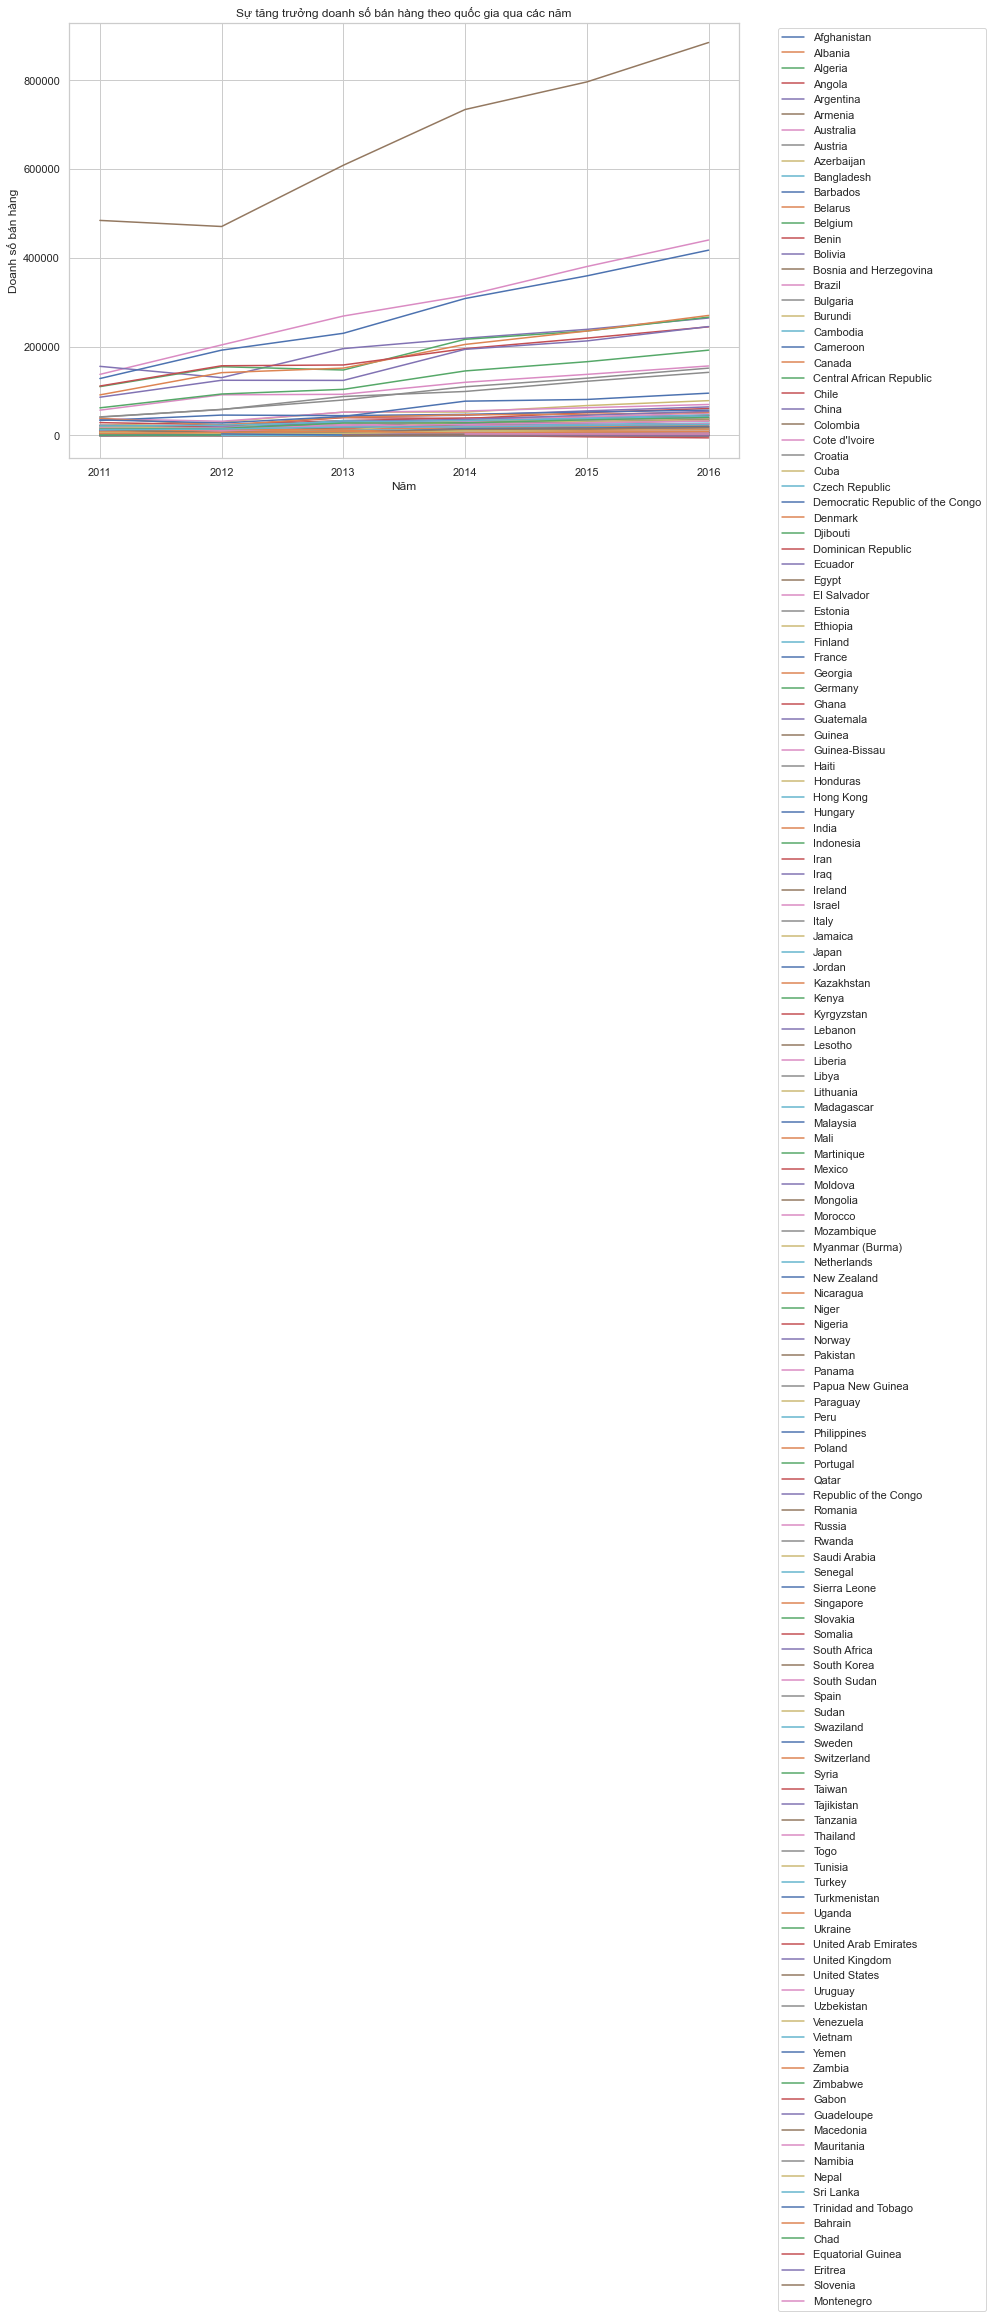

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Tạo hình và trục
plt.figure(figsize=(12, 8))

# Lặp qua các quốc gia duy nhất và vẽ biểu đồ tăng trưởng qua các năm
for country in result_df['Country'].unique():
    country_data = result_df[result_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['TotalSales'], label=country)

# Đặt nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Doanh số bán hàng')
plt.title('Sự tăng trưởng doanh số bán hàng theo quốc gia qua các năm')

# Hiển thị chú thích ở ngoài biểu đồ (ở góc trên bên phải)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.show()

# Biểu đồ thể hiện sự tăng trưởng doanh thu của Việt Nam

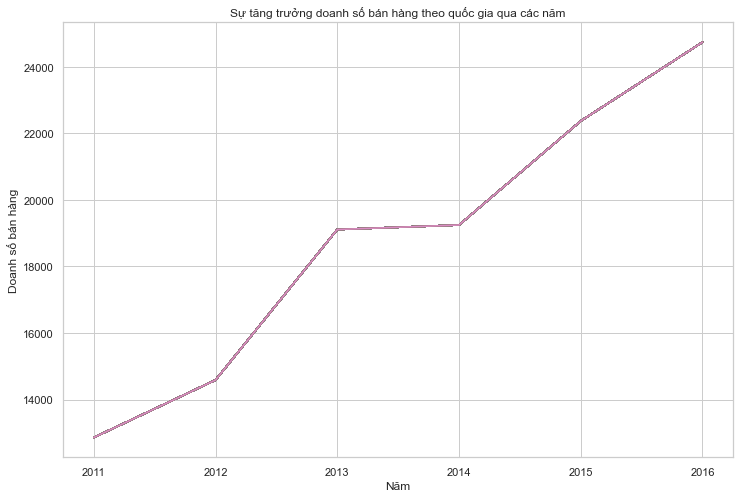

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Tạo hình và trục
plt.figure(figsize=(12, 8))

ct = 'Vietnam'

# Lặp qua các quốc gia duy nhất và vẽ biểu đồ tăng trưởng qua các năm
for country in result_df['Country'].unique():
    country_data = result_df[result_df['Country'] == ct]
    plt.plot(country_data['Year'], country_data['TotalSales'], label=country)

# Đặt nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Doanh số bán hàng')
plt.title('Sự tăng trưởng doanh số bán hàng theo quốc gia qua các năm')



# Hiển thị biểu đồ
plt.show()